<a href="https://colab.research.google.com/github/Samarth-991/Deep-Learning/blob/master/29_Traffic_Light_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Traffic Sign Dataset recognition 


In [7]:
# !pip install kaggle
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
# ! unzip /content/gtsrb-german-traffic-sign.zip
# ! rm -rf /content/gtsrb-german-traffic-sign.zip
# ! rm -rf /content/train
# ! rm -rf /content/test
# ! mkdir Data && mv Train Data

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

In [1]:
import numpy as np
import csv
import pandas as pd
import time
import cv2
import os
import random
import seaborn as sns
from PIL import Image
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras 
import gc 
print(tf.__version__)
print(cv2.__version__)
rand = np.random.seed(46)

2.3.0
4.1.2


In [5]:
Data = '/content/Data/Train'
labels = ['20 km/h', '30 km/h', '50 km/h', '60 km/h', '70 km/h', '80 km/h', '80 km/h end', '100 km/h', '120 km/h', 'No overtaking',
               'No overtaking for tracks', 'Crossroad with secondary way', 'Main road', 'Give way', 'Stop', 'Road up', 'Road up for track', 'Brock',
               'Other dangerous', 'Turn left', 'Turn right', 'Winding road', 'Hollow road', 'Slippery road', 'Narrowing road', 'Roadwork', 'Traffic light',
               'Pedestrian', 'Children', 'Bike', 'Snow', 'Deer', 'End of the limits', 'Only right', 'Only left', 'Only straight', 'Only straight and right', 
               'Only straight and left', 'Take right', 'Take left', 'Circle crossroad', 'End of overtaking limit', 'End of overtaking limit for track']

In [8]:
train_df = pd.read_csv('Train.csv')
print(train_df.shape)
train_df.head()

(39209, 8)


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [9]:
test_df = pd.read_csv('Test.csv')
print(test_df.shape)
test_df.head()

(12630, 8)


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [10]:
train_df['filename'] = train_df['Path'].apply(lambda x: x.split('/')[-1])
train_df = train_df.drop('Path',axis=1)
# shuffle the data frame 
train_df = train_df.sample(frac = 1) 
train_df.head()


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,filename
8156,48,56,6,6,43,51,4,00004_00056_00026.png
29910,27,32,5,5,22,27,25,00025_00048_00000.png
13009,39,36,5,6,34,31,8,00008_00028_00019.png
13554,50,50,6,6,45,45,8,00008_00046_00024.png
24228,106,107,9,10,96,97,16,00016_00006_00018.png


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


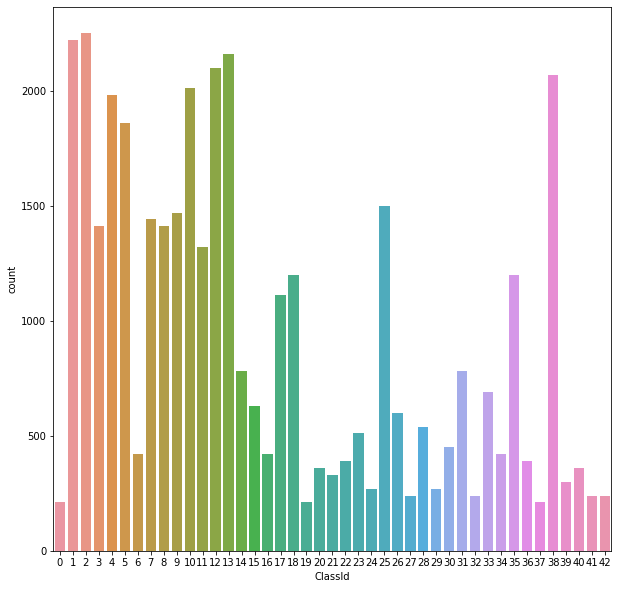

ClassId
0      210
1     2220
2     2250
3     1410
4     1980
5     1860
6      420
7     1440
8     1410
9     1470
10    2010
11    1320
12    2100
13    2160
14     780
15     630
16     420
17    1110
18    1200
19     210
20     360
21     330
22     390
23     510
24     270
25    1500
26     600
27     240
28     540
29     270
30     450
31     780
32     240
33     689
34     420
35    1200
36     390
37     210
38    2070
39     300
40     360
41     240
42     240
Name: filename, dtype: int64

In [11]:
plt.figure(figsize=(10,10))
sns.countplot(train_df.ClassId)
plt.show()
train_df.groupby(['ClassId'])['filename'].count()

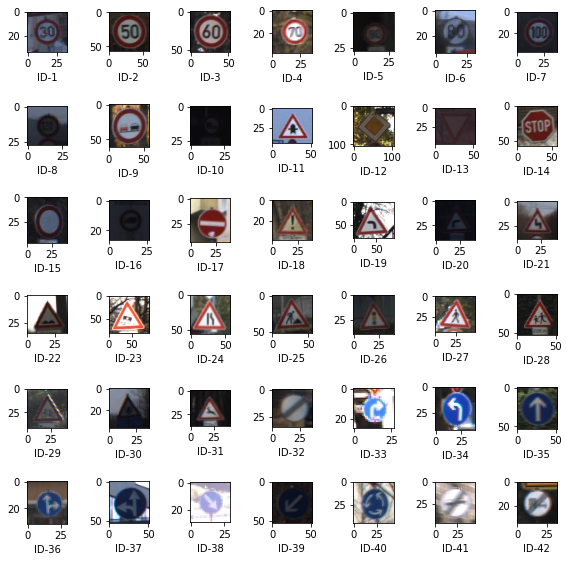

In [12]:
imgs_perId = []
df = train_df.groupby(['ClassId'])['filename']
for id , name in df:
    img_path = os.path.join(str(id),name[random.choice(name.index)])
    imgs_perId.append(img_path)

# Display Multiple images in a matix 
fig=plt.figure(figsize=(8, 8))
columns = 7
rows = 6
for i in range(1, columns*rows +1):
    img = plt.imread(os.path.join('Data/Train',imgs_perId[i]))
    fig.add_subplot(rows, columns, i,xlabel="ID-"+str(i))
    plt.imshow(img)
fig.tight_layout()

In [14]:
import tensorflow as tf
from tensorflow.data import Dataset
# This is one of the ways to create training data batch and label batch 
from  tensorflow.keras.preprocessing import image
print(tf.__version__)
BATCH_SIZE = 128
IMG_HEIGHT = 32
IMG_WIDTH = 32
IMG_SHAPE = (IMG_WIDTH, IMG_HEIGHT, 3)
EPOCHS = 50
INIT_LR = 1e-3

2.3.0


## Image size distribution
Dataset contains thouthands of images. Images don't have the same resolution. Some of them are big, other are small. We should somehow choose appropriate resolution of samples. The best way to visualize width and height corellation - using multivariate plotting.

As we can see bellow, most of images is rectangular (it can be prooved by applying liniar regression on the samples resolution). Most of samples are about 35x35 pixels. And only few samples have big resolution like a 100x100 pixels.

In [15]:
# trainDfDpiSubset = train_df[(train_df.Width < 80) & (train_df.Height < 80)];
# testDfDpiSubset = test_df[(test_df.Width < 80) & (test_df.Height < 80)];

# g = sns.JointGrid(x="Width", y="Height", data=trainDfDpiSubset)
# sns.kdeplot(trainDfDpiSubset.Width, trainDfDpiSubset.Height, cmap="Reds",
#         shade=False, shade_lowest=False, ax=g.ax_joint)
# sns.kdeplot(testDfDpiSubset.Width, testDfDpiSubset.Height, cmap="Blues",
#         shade=False, shade_lowest=False, ax=g.ax_joint)
# sns.distplot(trainDfDpiSubset.Width, kde=True, hist=False, color="r", ax=g.ax_marg_x, label='Train distribution')
# sns.distplot(testDfDpiSubset.Width, kde=True, hist=False, color="b", ax=g.ax_marg_x, label='Test distribution')
# sns.distplot(trainDfDpiSubset.Width, kde=True, hist=False, color="r", ax=g.ax_marg_y, vertical=True)
# sns.distplot(testDfDpiSubset.Height, kde=True, hist=False, color="b", ax=g.ax_marg_y, vertical=True)
# g.fig.set_figwidth(25)
# g.fig.set_figheight(8)
# plt.show();

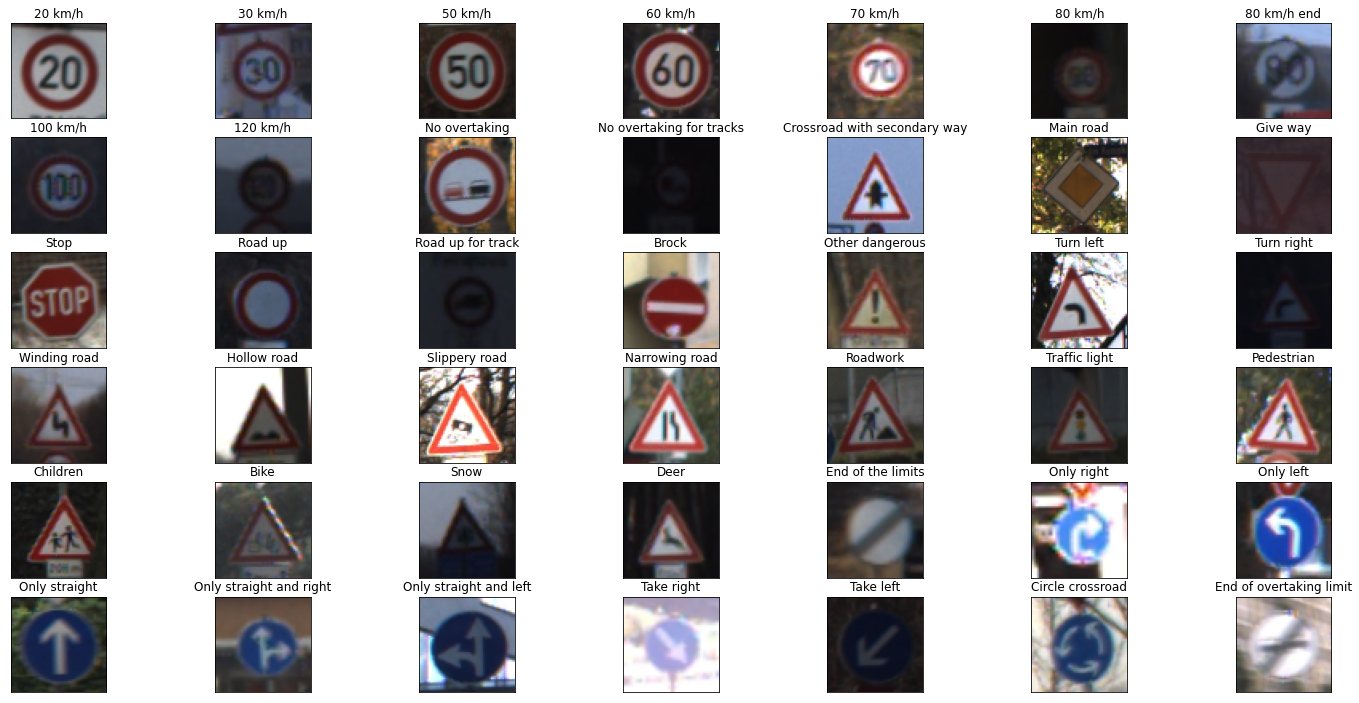

In [16]:

rows = 6
cols = 7
fig, axs = plt.subplots(rows, cols, sharex=True, sharey=True, figsize=(25, 12))
plt.subplots_adjust(left=None, bottom=None, right=None, top=0.9, wspace=None, hspace=None)

idx = 0
for i in range(rows):
    for j in range(cols):
        img = plt.imread(os.path.join('Data/Train',imgs_perId[idx]))
        img = cv2.resize(img, (60,60))
        axs[i,j].imshow(img)
        axs[i,j].set_title(labels[idx])
        axs[i,j].get_xaxis().set_visible(False)
        axs[i,j].get_yaxis().set_visible(False)
        idx += 1

In [13]:
image_generator = image.ImageDataGenerator(rescale=1./255,zca_whitening=True,
                                brightness_range=[2,5],
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                horizontal_flip=False,
                                validation_split=0.30
                                )

train_generator = image_generator.flow_from_directory(directory=Data,
                                                    target_size=(IMG_WIDTH, IMG_HEIGHT),                                                
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = image_generator.flow_from_directory(
    directory=Data, # same directory as training data
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical',
    subset='validation',
    shuffle=True) # set as validation data

nb_classes = train_generator.num_classes
print(nb_classes)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 39209 images belonging to 43 classes.
Found 11762 images belonging to 43 classes.
43


In [15]:
from sklearn.utils import class_weight
classweights = class_weight.compute_class_weight('balanced',
                                                 np.unique(train_generator.labels),
                                                 train_generator.labels)
Classweight= {}
for i,weight in enumerate(classweights):
    Classweight[i]=weight
print(Classweight)


{0: 4.342081949058693, 1: 0.41073748166771423, 2: 0.45365035288672917, 3: 0.6907857646229739, 4: 0.4342081949058693, 5: 0.4221468561584841, 6: 1.1690220632081096, 7: 1.447360649686231, 8: 2.1710409745293466, 9: 0.8214749633354285, 10: 0.7598643410852713, 11: 4.342081949058693, 12: 0.4052609819121447, 13: 2.5328811369509046, 14: 2.7631430584918957, 15: 2.3380441264162193, 16: 1.7879160966712266, 17: 3.3771748492678726, 18: 0.6078914728682171, 19: 1.5197286821705427, 20: 3.7993217054263564, 21: 1.6885874246339363, 22: 3.3771748492678726, 23: 0.6466930562427841, 24: 2.0263049095607237, 25: 1.1690220632081096, 26: 3.7993217054263564, 27: 1.3234212036318223, 28: 2.1710409745293466, 29: 0.7598643410852713, 30: 2.3380441264162193, 31: 4.342081949058693, 32: 0.44050106729580946, 33: 3.0394573643410854, 34: 0.46052384308198263, 35: 2.5328811369509046, 36: 3.7993217054263564, 37: 3.7993217054263564, 38: 0.49023505876469115, 39: 2.1710409745293466, 40: 0.6332202842377261, 41: 0.6466930562427841, 

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow import keras
from tensorflow.keras.applications import ResNet50V2,MobileNetV2
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
# Define Hyperparameters 
opt = Adam(lr=0.01)

# Define Check point 
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Pre-trained model with MobileNetV2
base_model = MobileNetV2(
    input_shape=IMG_SHAPE,
    include_top=False,
    weights='imagenet')
head_model = base_model.output
head_model = tf.keras.layers.GlobalMaxPooling2D()(head_model)
head_model = tf.keras.layers.Flatten(name="Flatten")(head_model)
head_model = tf.keras.layers.Dense(64,activation='relu')(head_model)
prediction_layer = tf.keras.layers.Dense(nb_classes, activation='softmax')(head_model)

model = tf.keras.Model(inputs=base_model.input,outputs=prediction_layer)


#Compilation of the model
model.compile(
    loss='categorical_crossentropy', 
    optimizer=opt, 
    metrics=['accuracy']
)

In [ ]:
model.summary()

In [18]:
# Fitting the model 
H = model.fit(train_generator,
              epochs=EPOCHS,
              callbacks=callbacks_list,
              validation_data = validation_generator , 
              #class_weight=Classweight
              )

Epoch 1/50


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


1225/1226 [============================>.] - ETA: 0s - loss: 3.4901 - accuracy: 0.0601
Epoch 00001: val_accuracy improved from -inf to 0.05509, saving model to model_weights.h5
1226/1226 [==============================] - 63s 51ms/step - loss: 3.4900 - accuracy: 0.0601 - val_loss: 3.5103 - val_accuracy: 0.0551
Epoch 2/50
1225/1226 [============================>.] - ETA: 0s - loss: 3.4814 - accuracy: 0.0603
Epoch 00002: val_accuracy did not improve from 0.05509
1226/1226 [==============================] - 61s 49ms/step - loss: 3.4815 - accuracy: 0.0604 - val_loss: 3.4960 - val_accuracy: 0.0538
Epoch 3/50
1226/1226 [==============================] - ETA: 0s - loss: 3.2363 - accuracy: 0.0964
Epoch 00003: val_accuracy did not improve from 0.05509
1226/1226 [==============================] - 61s 50ms/step - loss: 3.2363 - accuracy: 0.0964 - val_loss: 12.4034 - val_accuracy: 0.0338
Epoch 4/50
1225/1226 [============================>.] - ETA: 0s - loss: 3.1543 - accuracy: 0.1147
Epoch 00004: 

In [19]:
tf.saved_model.save(model,export_dir='trafficsign_classifier/1',signatures=None)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: trafficsign_classifier/1/assets


In [ ]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Accuracy on dataset")
plt.xlabel("Epoch ")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

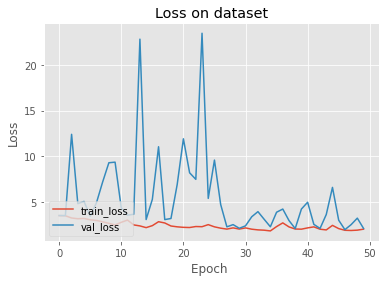

In [21]:
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.title("Loss on dataset")
plt.xlabel("Epoch ")
plt.ylabel("Loss")
plt.legend(loc="lower left")

In [19]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
saved_model = load_model('/content/model_weights.h5')

In [20]:
def decode_img(img,shape=(256,256),channel = 3):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_png(img, channels=channel)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float16)
  # resize the image to the desired size.
  img = tf.image.resize(img,[shape[0],shape[1]])
  return img.numpy()

In [ ]:
test_data = []
for index , row in test_df.iterrows():
    filepath = row['Path']
    img = tf.io.read_file(filepath)
    img = decode_img(img,shape=(IMG_WIDTH,IMG_HEIGHT))
    img = np.expand_dims(img, axis=0)
    test_data.append(img)
    
gc.collect()

In [ ]:
test_label = []
for img in test_data[:1000]:
    predict_label = np.argmax(saved_model.predict(img))
    test_label.append(predict_label)

gc.collect()

In [24]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#inference_df = pd.DataFrame({'Predicted_label':predict_label,'GT_label':list(train_df['ClassId'])})
GT_label = list(train_df['ClassId'][:1000])
print(accuracy_score(test_label,GT_label))


0.035
